# Linear Regression

### Salary_hike -> Build a prediction model for Salary_hike using (Salary_Data.csv)

    I am not sure if we can build a Salary Hike model as Salary hike depends on whole lot of other parameters such as Skills, Attitude, Leadership, Experience, Resourcefullness, Speed-Accuracy-Precission in performance etc. 
    
    However in our case we can predict the salary based on the years of experience, considering all other parameters as constants or equal. Our model should be able to predict the ideal salary to be offered to a person with certain experience expressed in years. let us begin our model building.... 

In [1]:
import pandas as pd 
import numpy as np

In [2]:
Sal = pd.read_csv('Salary_Data.csv')
Sal.shape

(30, 2)

In [3]:
Sal # As data has no null values and entire data is float. Data is ready for processing.

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
import matplotlib as plt
import seaborn as sns

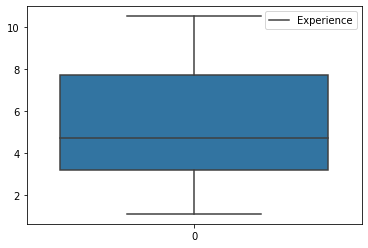

In [5]:
sns.boxplot(data = [Sal.YearsExperience]) # Data is slightly positively skewed
plt.pyplot.legend(['Experience'])

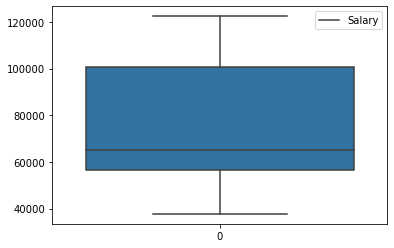

In [6]:
sns.boxplot(data = [Sal.Salary]) # data is skewed (positive)
plt.pyplot.legend(['Salary'])

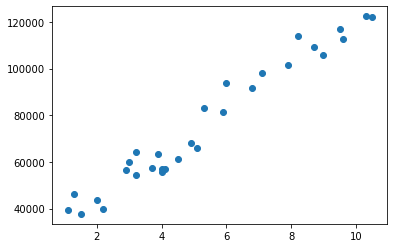

In [7]:
plt.pyplot.scatter(Sal.YearsExperience,Sal.Salary) ### it shows a strong possitive correlation let us calculate correlation (r)

In [8]:
Sal.corr() ## shows very high correlation between the the two columns

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [9]:
Sal.YearsExperience.corr(Sal.Salary) # alternatively we can check the correlation by specific veriables

0.9782416184887599

### Case for linear regression

    There is Direct Linear relation between "Years of Experience" and "Salary", Ther is a strong correlation between the variables with a r score of .978, The data is continuous data. All these conditions are perfectly suitable to Simple Linear Regression for our model building.
    
    Based on common sence we can say that "Salary" is dependent on "Experience" and not vice versa.

### Construct a linear Regression model, let us import ols from statsmodels.formula.api

In [10]:
from statsmodels.formula.api import ols

In [11]:
Hike_Model = ols('Salary~YearsExperience',data=Sal).fit() # fitting the model using ols method

In [12]:
Hike_Model.params  

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

#### ---as per our model the equation is---
Our model has given us an intercept - B0 (beta not) = 25792.20 and slope - B1 (beta 1) = 9449.96, putting the values in the equation [Y = B0 + B1x] we get our regression equation [Y = 25792.20 + 9449.96 * x]. let us check the rsquare for accuracy of our model.

In [13]:
Hike_Model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sun, 23 May 2021   Prob (F-statistic):           1.14e-20
Time:                        00:00:58   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**As we know Rsquare can take values ranging from 0 to 1, 0 being the worst and 1 being the best scores. Our model has a very good Rsquare score of 0.957. Thre is no futher need of any transformation to be applied to get our prediction.**

In [14]:
Hike_Model.conf_int(0.95)

,0,1
Intercept,25648.381149,25936.019248
YearsExperience,9425.998027,9473.926616


Confidence interval for any regression model will give us a range with upper and lower limit using the fitted value. we can construct two regression lines using the above parameters, the area that fall between the these two parellel line is the conf interval for the fitted value. The interpretation is with the specified Confidence level, 1-Alpha, the interval conatains the the actual values of y, smaller the range the better it is. 

In [15]:
Predict_val = Hike_Model.predict(Sal.YearsExperience)

In [16]:
Predict_val.head()

0    36187.158752
1    38077.151217
2    39967.143681
3    44692.124842
4    46582.117306
dtype: float64

Text(0, 0.5, 'Salary')

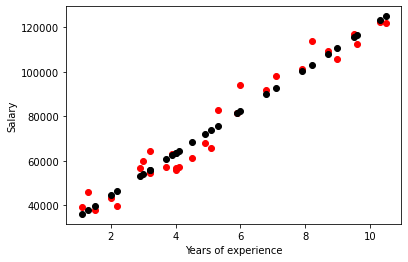

In [17]:
# sns.scatterplot(x = Sal.YearsExperience, y = Sal.Salary );sns.scatterplot(x = Sal.YearsExperience, y = Predict_val )
plt.pyplot.scatter(x = Sal.YearsExperience, y = Sal.Salary, color = 'red')
plt.pyplot.scatter(x = Sal.YearsExperience, y = Predict_val, color = 'black')
plt.pyplot.xlabel('Years of experience'); plt.pyplot.ylabel('Salary')

### Our Regression like to perfectly fitting the actual values. in the above plot.

In [18]:
Resid_vals = Hike_Model.resid_pearson
Resid_vals

array([ 0.54520896,  1.40418217, -0.38632031, -0.20163464, -1.15596979,
        0.59514885,  1.03793812, -0.27418681,  1.45343166, -0.61642477,
        0.09863781, -1.34720543, -1.1462834 , -1.28812023, -1.24492716,
       -0.71851921, -1.37484017,  1.24578559, -0.03178436,  1.9777821 ,
        0.29128615,  0.93050694,  0.14772822,  1.81920104,  0.24603492,
       -0.90870332,  0.24223936, -0.66976978, -0.12712026, -0.54330225])

Text(0, 0.5, 'Deviated Values')

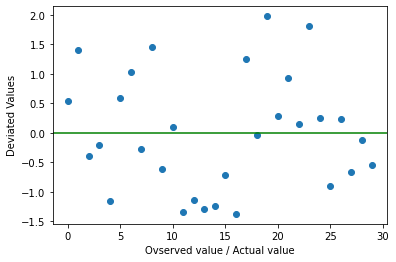

In [19]:
plt.pyplot.plot(Resid_vals,'o');plt.pyplot.axhline(y=0, color = 'green')
plt.pyplot.xlabel('Ovserved value / Actual value'); plt.pyplot.ylabel('Deviated Values')

Ideally the residuals should randomly scatter over the plot on either side of the line, showing no uniformity in their vaience or showing no pattern.

##### Both the plots are to demonstrate the fittment of our model. As, it is said that, visuals are more appealing than words. Hence the plots.